In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tb1 = pd.read_excel('company.xls')

#1.	检测数据第3行是否有缺失值，并统计缺失值的数量。
n = tb1[3:4].isnull().sum(axis=1)
n = n.tolist()
print("第3行有{}个缺失值".format(n[0]))
#2.	删除一行内有两个以上（不含2个）缺失值的数据
sums = tb1.isnull().sum(axis=1)
sums_result = list(sums[sums > 2].index)
print("第{}行存在超过两个缺失值".format(sums_result))
tb2 = tb1.drop(sums_result, axis=0)
#3.	删除scalary或者age为空的行。
sums = (tb2.salary.isnull()) | (tb2.age.isnull())
sums_result = list(sums[sums == True].index)
tb3 = tb2.drop(sums_result, axis=0)
#4.	将sex列中的空缺值用前向值填充。
tb3.sex = tb3.sex.fillna(method='ffill')
#5.	对剩余空缺的数据用平均值替代。
tb3.time = tb3.time.fillna(np.mean(tb3.time))
#6.	指定salary和age列重复时去重,并保留最后出现的记录
tb3 = tb3.drop_duplicates(subset=['salary', 'age'], keep='last')
#7.	将sex这一列中的Female换成1，Male 换成0.
temp = tb3.sex == 'Female'
tb3.sex = temp.astype('int')


#8.	通过map方法和cut方法实现年龄的转换
# 将18岁以下的转成少年, 19-35岁的转换成“青年”
# 36-59岁的转换成“中年”, 60及以上转换成“老年”
# 并在数据最后增加一列，列名分别为“年龄段”、‘年龄段1’
def age_group(x):
    if x <= 18:
        return '少年'
    elif 19 <= x <= 35:
        return '青年'
    elif 36 <= x <= 59:
        return '中年'
    elif 60 <= x:
        return '老年'


tb3['年龄段'] = tb3['age'].map(age_group)
tb3['年龄段1'] = pd.cut(tb3['age'], [0, 18, 35, 60, 150],
                     labels=[u"少年", u"青年", u"中年", u"老年"])
tb3.head()


第3行有1个缺失值
第[2, 4]行存在超过两个缺失值


,company,salary,age,time,sex,年龄段,年龄段1
0,B,19.0,48.0,62.0,1,中年,中年
1,C,26.0,32.0,61.0,1,青年,青年
3,C,39.0,42.0,56.0,1,中年,中年
6,A,5.0,17.0,54.0,1,少年,少年
7,B,43.0,105.0,54.0,1,老年,老年


箱线图法异常值检测：
 6     False
11    False
14    False
18    False
21    False
23    False
26    False
27    False
Name: age, dtype: bool 

箱线图法异常值检测：
 0     False
7      True
8     False
20    False
29    False
Name: age, dtype: bool 

箱线图法异常值检测：
 1     False
3     False
10    False
13    False
17    False
19    False
22    False
24    False
25    False
28    False
Name: age, dtype: bool 



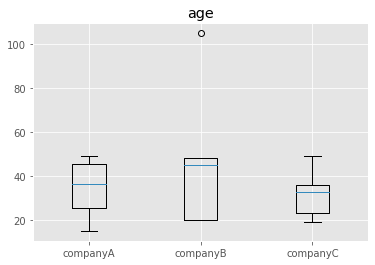

In [2]:
#9. 查询各个公司中年龄的异常值，并将异常值修改为40
companyA = tb3[tb3['company'] == 'A']
companyB = tb3[tb3['company'] == 'B']
companyC = tb3[tb3['company'] == 'C']


def unusual(data):
    df = data['age']
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    un = (Q3 + 1.5 * IQR < df) | (df < Q1 - 1.5 * IQR)
    print("箱线图法异常值检测：\n", un, "\n")
    return un


un1 = unusual(companyA)
un2 = unusual(companyB)
un3 = unusual(companyC)
plt.style.use("ggplot")  # type: ignore
plt.rcParams["font.size"] = 10  #设置字体大小
plt.boxplot([companyA['age'], companyB['age'], companyC['age']],  # type: ignore
            labels=['companyA', 'companyB', 'companyC'])
plt.title('age')
plt.savefig('gender.png', dpi=400)

In [3]:
#查找对应值并进行修改
temp = tb3.loc[list(un2[un2 == True].index)]
temp['age'] = 40
tb3.loc[list(un2[un2 == True].index)] = temp
tb3.loc[list(un2[un2 == True].index)]


,company,salary,age,time,sex,年龄段,年龄段1
7,B,43.0,40.0,54.0,1,老年,老年
